In [ ]:
!pip install pandas numpy scikit-learn tensorflow

Loading Training Dataset

In [ ]:
import pandas as pd
import os

# Load training dataset
print("Loading training dataset...")
data = pd.read_csv("UNSW_NB15_training-set.csv")

# Print column names and count
print("Columns in dataset:", data.columns.tolist())
print("Number of columns:", len(data.columns))

# Check label distribution
print("Label distribution:\n", data['label'].value_counts())

# Sample 1000 normal (0) and 1000 attack (1) instances
print("Creating subset...")
normal = data[data['label'] == 0].sample(n=1000, random_state=42)
attack = data[data['label'] == 1].sample(n=1000, random_state=42)
subset = pd.concat([normal, attack])

# Save subset
subset.to_csv("unsw_nb15_subset.csv", index=False)
print("Subset created. Size:", os.path.getsize("unsw_nb15_subset.csv") / 1024, "KB")
print("Subset label distribution:\n", subset['label'].value_counts())

# Verify subset
data = pd.read_csv("unsw_nb15_subset.csv")
print(data.head())
print("Columns:", data.columns.tolist())
print("Number of rows:", len(data))

Loading training dataset...
Columns in dataset: ['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label']
Number of columns: 45
Label distribution:
 label
1    119341
0     56000
Name: count, dtype: int64
Creating subset...
Subset created. Size: 379.7216796875 KB
Subset label distribution:
 label
0    1000
1    1000
Name: count, dtype: int64
      id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0  95745  0.661656   tcp    http   FIN     10     10     804    1330   
1  44164  1.501572   tcp    http   FIN     60     16 

Verify the Subset

In [ ]:
data = pd.read_csv("unsw_nb15_subset.csv")
print(data.head())
print("Columns:", data.columns.tolist())
print("Number of rows:", len(data))

      id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0  95745  0.661656   tcp    http   FIN     10     10     804    1330   
1  44164  1.501572   tcp    http   FIN     60     16   68195     698   
2  35747  0.022939   tcp       -   FIN     40     42    2542   23508   
3  13714  0.333839   tcp     ssh   FIN     32     24    3728    5474   
4  32128  0.023857   tcp       -   FIN     50     48    3062   32538   

          rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0    28.715827  ...                 1               5             0   
1    49.947654  ...                 1               2             0   
2  3531.104190  ...                 1               1             0   
3   164.750074  ...                 1               5             0   
4  4065.892720  ...                 1               6             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 1           2           5         

Complete Experiment

Installing libraries...
Libraries installed.
Loading dataset...
Dataset loaded. Size: 379.7216796875 KB
Selected numerical columns saved as 'numerical_cols.txt': ['dur', 'spkts', 'dpkts', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sinpkt', 'dinpkt']
Dataset split: Training size = 1600 , Testing size = 400
Training label distribution:
 label
0    801
1    799
Name: count, dtype: int64
Testing label distribution:
 label
1    201
0    199
Name: count, dtype: int64
Performing grid search...
Grid search completed. Best parameters: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Preprocessor saved as 'preprocessor.joblib'.

Model Performance Metrics:
Accuracy: 0.9500
Precision: 0.9415
Recall: 0.9602
F1-Score: 0.9507
Model saved as 'xgboost_unsw_nb15.json'.
Results saved to 'results.txt'.
Top 10 Feature Importance:
         Feature  Importance
4           sttl    0.600440
69     proto_tcp    0.095286
71     proto_udp    0.044228
81   service_dn

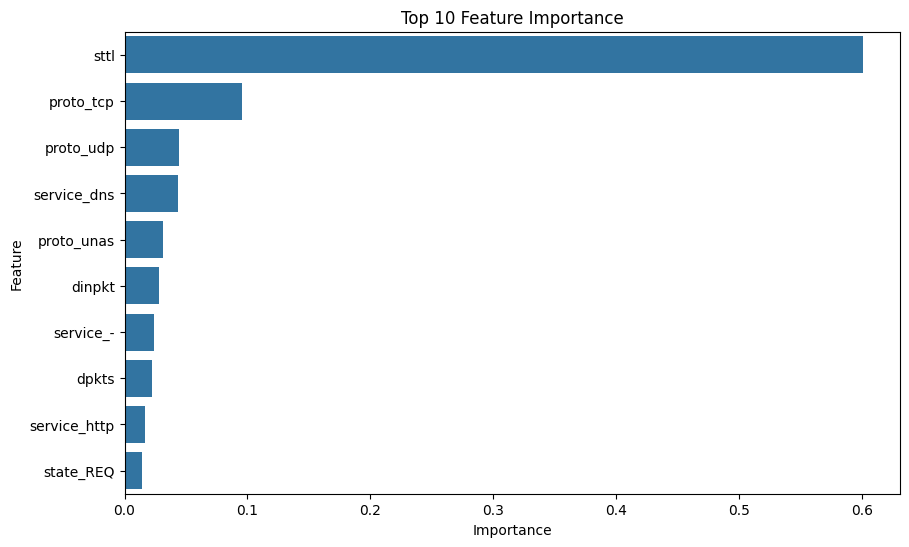

Feature importance saved to 'feature_importance.csv' and 'feature_importance.png'.


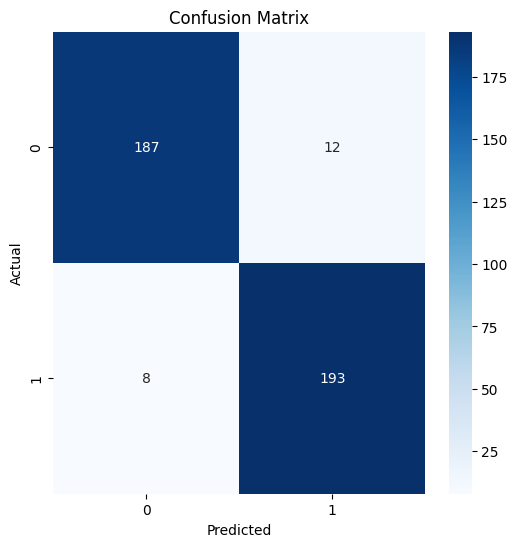

Confusion matrix saved as 'confusion_matrix.png'.


In [ ]:
# Install libraries
print("Installing libraries...")
!pip install pandas numpy scikit-learn xgboost matplotlib seaborn tensorflow joblib
print("Libraries installed.")

# Import libraries
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load dataset
filename = "unsw_nb15_subset.csv"
print("Loading dataset...")
data = pd.read_csv(filename)
print("Dataset loaded. Size:", os.path.getsize(filename) / 1024, "KB")

# Define column names
col_names = [
    "id", "dur", "proto", "service", "state", "spkts", "dpkts", "sbytes", "dbytes",
    "rate", "sttl", "dttl", "sload", "dload", "sloss", "dloss", "sinpkt", "dinpkt",
    "sjit", "djit", "swin", "stcpb", "dtcpb", "dwin", "tcprtt", "synack", "ackdat",
    "smean", "dmean", "trans_depth", "response_body_len", "ct_srv_src", "ct_state_ttl",
    "ct_dst_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm",
    "is_ftp_login", "ct_ftp_cmd", "ct_flw_http_mthd", "ct_src_ltm", "ct_srv_dst",
    "is_sm_ips_ports", "attack_cat", "label"
]
data.columns = col_names

# Define features (exclude attack_cat)
categorical_cols = ['proto', 'service', 'state']
numeric_cols = [col for col in data.columns if col not in categorical_cols + ['label', 'id', 'attack_cat']]

# Preprocessing
data['label'] = data['label'].apply(lambda x: 0 if x == 0 else 1)
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Correlation-based feature selection
corr_matrix = data[numeric_cols].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
selected_numerical = [col for col in numeric_cols if col not in to_drop][:10]
numerical_cols = selected_numerical

# Save numerical columns
with open('numerical_cols.txt', 'w') as f:
    f.write('\n'.join(numerical_cols))
print("Selected numerical columns saved as 'numerical_cols.txt':", numerical_cols)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ])

# Split features and target
X = data[numerical_cols + categorical_cols]
y = data['label']

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset split: Training size =", len(X_train), ", Testing size =", len(X_test))
print("Training label distribution:\n", y_train.value_counts())
print("Testing label distribution:\n", y_test.value_counts())

# Create pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(objective='binary:logistic', random_state=42, enable_categorical=False))
])

# Hyperparameter tuning
param_grid = {
    'classifier__max_depth': [3, 5],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__n_estimators': [100, 200]
}
grid_search = GridSearchCV(xgb_pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
print("Performing grid search...")
grid_search.fit(X_train, y_train)
print("Grid search completed. Best parameters:", grid_search.best_params_)

# Save preprocessor
joblib.dump(grid_search.best_estimator_.named_steps['preprocessor'], 'preprocessor.joblib')
print("Preprocessor saved as 'preprocessor.joblib'.")

# Predict and evaluate
y_pred = grid_search.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

# Print results
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Save model
grid_search.best_estimator_.named_steps['classifier'].save_model('xgboost_unsw_nb15.json')
print("Model saved as 'xgboost_unsw_nb15.json'.")

# Save results
with open('results.txt', 'w') as f:
    f.write(f"Accuracy: {accuracy:.4f}\n")
    f.write(f"Precision: {precision:.4f}\n")
    f.write(f"Recall: {recall:.4f}\n")
    f.write(f"F1-Score: {f1:.4f}\n")
print("Results saved to 'results.txt'.")

# Feature importance
feature_names = numerical_cols + list(grid_search.best_estimator_.named_steps['preprocessor']
                                     .named_transformers_['cat'].get_feature_names_out(categorical_cols))
importance = grid_search.best_estimator_.named_steps['classifier'].feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)
print("Top 10 Feature Importance:")
print(importance_df)
importance_df.to_csv('feature_importance.csv', index=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Top 10 Feature Importance")
plt.savefig('feature_importance.png')
plt.show()
print("Feature importance saved to 'feature_importance.csv' and 'feature_importance.png'.")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()
print("Confusion matrix saved as 'confusion_matrix.png'.")

Validation Code

Loading original training dataset...
Creating new test subset...
Loading saved numerical columns...
Loaded numerical columns: ['dur', 'spkts', 'dpkts', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sinpkt', 'dinpkt']
Loading saved preprocessor...
Transforming new test subset...
Loading saved model...
Predicting on new test subset...

Validation Performance Metrics:
Accuracy: 0.9180
Precision: 0.9035
Recall: 0.9360
F1-Score: 0.9194
Validation results saved to 'validation_results.txt'.


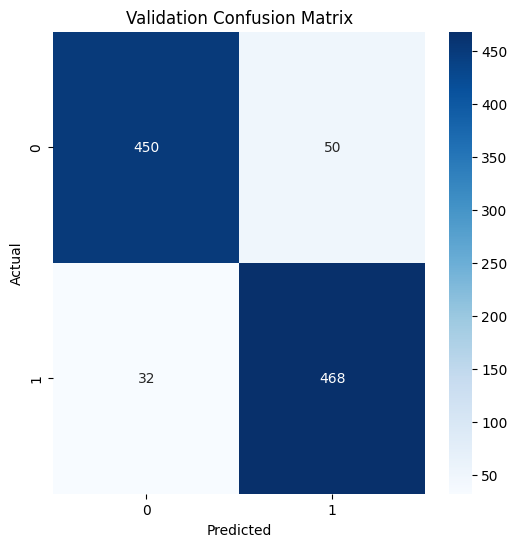

Validation confusion matrix saved as 'validation_confusion_matrix.png'.


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Load original training dataset
print("Loading original training dataset...")
data = pd.read_csv("UNSW_NB15_training-set.csv")

# Sample new test subset
print("Creating new test subset...")
normal = data[data['label'] == 0].sample(n=500, random_state=100)
attack = data[data['label'] == 1].sample(n=500, random_state=100)
new_test = pd.concat([normal, attack])

# Define column names
col_names = [
    "id", "dur", "proto", "service", "state", "spkts", "dpkts", "sbytes", "dbytes",
    "rate", "sttl", "dttl", "sload", "dload", "sloss", "dloss", "sinpkt", "dinpkt",
    "sjit", "djit", "swin", "stcpb", "dtcpb", "dwin", "tcprtt", "synack", "ackdat",
    "smean", "dmean", "trans_depth", "response_body_len", "ct_srv_src", "ct_state_ttl",
    "ct_dst_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm",
    "is_ftp_login", "ct_ftp_cmd", "ct_flw_http_mthd", "ct_src_ltm", "ct_srv_dst",
    "is_sm_ips_ports", "attack_cat", "label"
]
new_test.columns = col_names

# Preprocessing
new_test['label'] = new_test['label'].apply(lambda x: 0 if x == 0 else 1)
categorical_cols = ['proto', 'service', 'state']
numeric_cols = [col for col in new_test.columns if col not in categorical_cols + ['label', 'id', 'attack_cat']]
new_test[numeric_cols] = new_test[numeric_cols].fillna(new_test[numeric_cols].median())

# Load numerical columns
print("Loading saved numerical columns...")
with open('numerical_cols.txt', 'r') as f:
    numerical_cols = f.read().splitlines()
print("Loaded numerical columns:", numerical_cols)

# Load preprocessor
print("Loading saved preprocessor...")
preprocessor = joblib.load('preprocessor.joblib')

# Prepare features and target
X_new_test = new_test[numerical_cols + categorical_cols]
y_new_test = new_test['label']

# Transform test data
print("Transforming new test subset...")
X_new_test_transformed = preprocessor.transform(X_new_test)

# Load model
print("Loading saved model...")
model = xgb.XGBClassifier()
model.load_model('xgboost_unsw_nb15.json')

# Predict
print("Predicting on new test subset...")
y_pred = model.predict(X_new_test_transformed)

# Calculate metrics
accuracy = accuracy_score(y_new_test, y_pred)
precision = precision_score(y_new_test, y_pred, zero_division=0)
recall = recall_score(y_new_test, y_pred, zero_division=0)
f1 = f1_score(y_new_test, y_pred, zero_division=0)

# Print results
print("\nValidation Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Save results
with open('validation_results.txt', 'w') as f:
    f.write(f"Validation Accuracy: {accuracy:.4f}\n")
    f.write(f"Validation Precision: {precision:.4f}\n")
    f.write(f"Validation Recall: {recall:.4f}\n")
    f.write(f"Validation F1-Score: {f1:.4f}\n")
print("Validation results saved to 'validation_results.txt'.")

# Confusion matrix
cm = confusion_matrix(y_new_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.savefig('validation_confusion_matrix.png')
plt.show()
print("Validation confusion matrix saved as 'validation_confusion_matrix.png'.")

ROC Curve

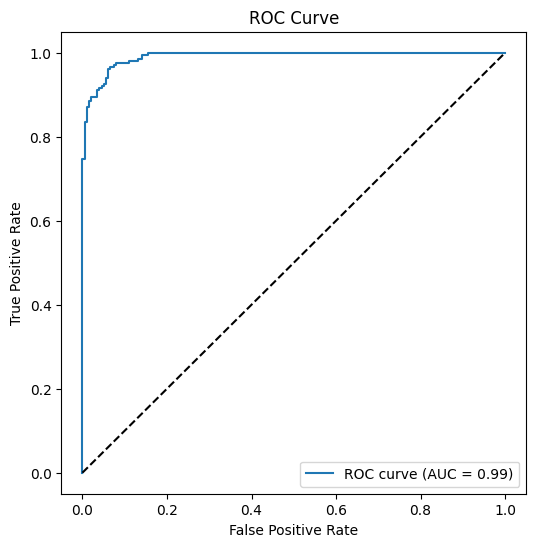

ROC curve saved as 'roc_curve.png'.


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import pandas as pd
import joblib
import xgboost as xgb
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("unsw_nb15_subset.csv")
col_names = [
    "id", "dur", "proto", "service", "state", "spkts", "dpkts", "sbytes", "dbytes",
    "rate", "sttl", "dttl", "sload", "dload", "sloss", "dloss", "sinpkt", "dinpkt",
    "sjit", "djit", "swin", "stcpb", "dtcpb", "dwin", "tcprtt", "synack", "ackdat",
    "smean", "dmean", "trans_depth", "response_body_len", "ct_srv_src", "ct_state_ttl",
    "ct_dst_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm",
    "is_ftp_login", "ct_ftp_cmd", "ct_flw_http_mthd", "ct_src_ltm", "ct_srv_dst",
    "is_sm_ips_ports", "attack_cat", "label"
]
data.columns = col_names
data['label'] = data['label'].apply(lambda x: 0 if x == 0 else 1)
numeric_cols = [col for col in data.columns if col not in ['proto', 'service', 'state', 'label', 'id', 'attack_cat']]
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Load numerical columns
with open('numerical_cols.txt', 'r') as f:
    numerical_cols = f.read().splitlines()
categorical_cols = ['proto', 'service', 'state']

# Prepare data
X = data[numerical_cols + categorical_cols]
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load preprocessor and model
preprocessor = joblib.load('preprocessor.joblib')
X_test_transformed = preprocessor.transform(X_test)
model = xgb.XGBClassifier()
model.load_model('xgboost_unsw_nb15.json')

# Predict probabilities
y_prob = model.predict_proba(X_test_transformed)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('roc_curve.png')
plt.show()
print("ROC curve saved as 'roc_curve.png'.")

Feature Analysis

In [ ]:
feature_names = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df.to_csv('feature_importance.csv')
print(importance_df.head())

  Feature  Importance
0     dur         0.0
1   spkts         0.0
2  sbytes         0.0
3    rate         0.0
4    sttl         0.0


In [ ]:
data = pd.read_csv("UNSW_NB15_training-set.csv")
normal = data[data['label'] == 0].sample(n=1000, random_state=42)
attack = data[data['label'] == 1].sample(n=1000, random_state=42)
subset = pd.concat([normal, attack])
subset.to_csv("unsw_nb15_subset.csv", index=False)
print("Subset created. Size:", os.path.getsize("unsw_nb15_subset.csv") / 1024, "KB")

Subset created. Size: 379.7216796875 KB


Loading saved model and preprocessor...
Top 10 Feature Importance:
              Feature  Importance
73  attack_cat_Normal         1.0
1               spkts         0.0
2              sbytes         0.0
3                rate         0.0
0                 dur         0.0
5                dttl         0.0
6               sload         0.0
7               dload         0.0
8              sinpkt         0.0
9              dinpkt         0.0
Feature importance saved to 'feature_importance.csv'.


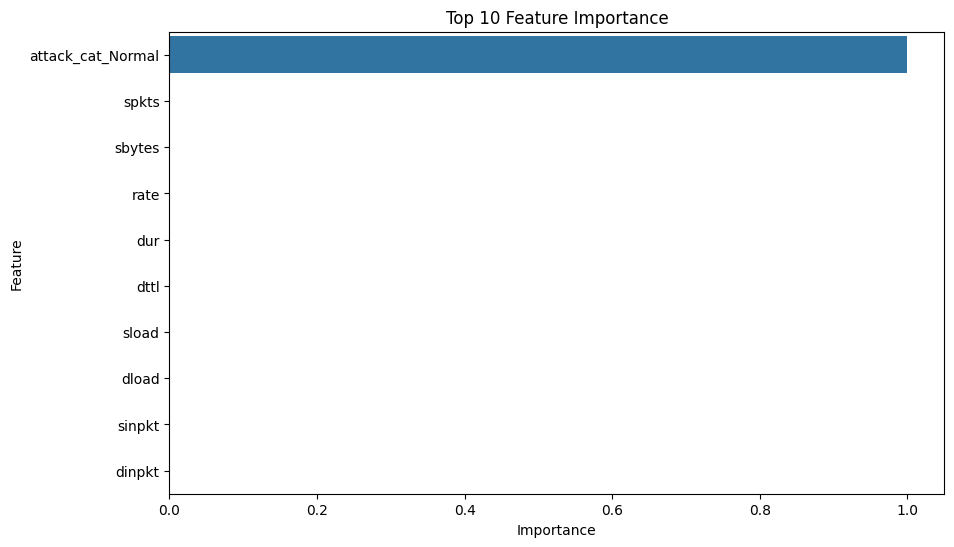

Corrected feature importance plot saved as 'feature_importance_corrected.png'.


In [ ]:
import pandas as pd
import xgboost as xgb
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load model and preprocessor
print("Loading saved model and preprocessor...")
model = xgb.XGBClassifier()
model.load_model('xgboost_unsw_nb15.json')
preprocessor = joblib.load('preprocessor.joblib')

# Load numerical columns
with open('numerical_cols.txt', 'r') as f:
    numerical_cols = f.read().splitlines()
categorical_cols = ['proto', 'service', 'state', 'attack_cat']

# Get feature names
feature_names = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Print top features
print("Top 10 Feature Importance:")
print(importance_df)

# Save to CSV
importance_df.to_csv('feature_importance.csv', index=False)
print("Feature importance saved to 'feature_importance.csv'.")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Top 10 Feature Importance")
plt.savefig('feature_importance_corrected.png')
plt.show()
print("Corrected feature importance plot saved as 'feature_importance_corrected.png'.")